In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("Advertising.csv",index_col=0)

In [4]:
df.head(10)
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data=df[["TV","sales"]]
X=data["TV"]
y=data["sales"]

In [8]:
type(X)

pandas.core.series.Series

In [9]:
type(y)

pandas.core.series.Series

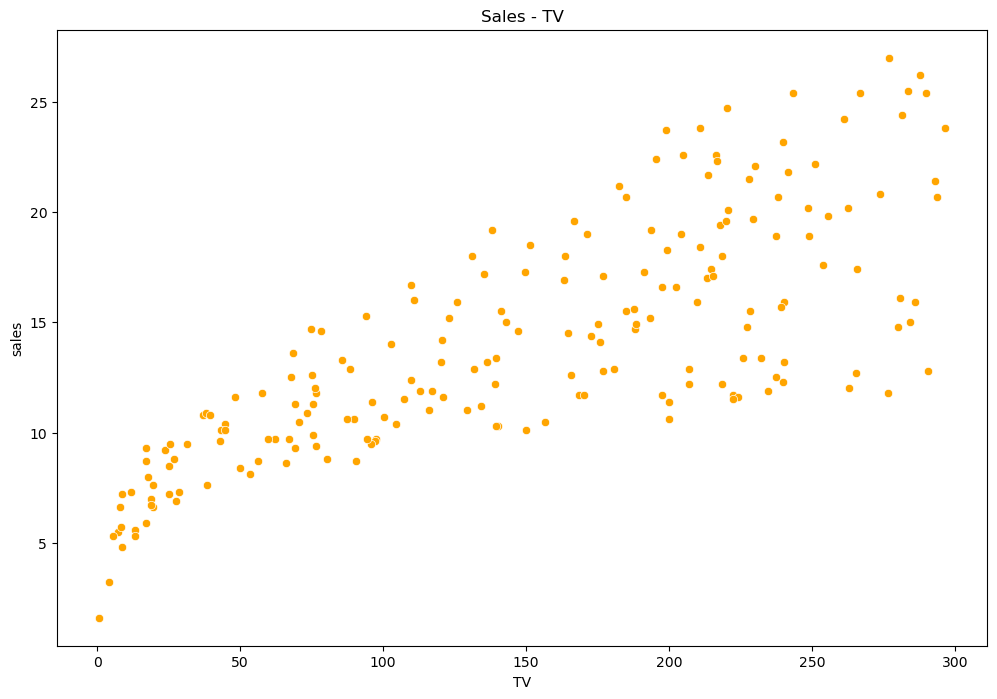

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data,x="TV",y="sales",color="orange")
plt.title("Sales - TV")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
print("X'in boyutu",X.shape)
print("y'nin boyutu",y.shape)

X'in boyutu (200,)
y'nin boyutu (200,)


In [14]:
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=100)

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
print(lr.intercept_) #beta 0
print(lr.coef_) #beta 1, eğim

[6.98966586]
[[0.04649736]]


In [21]:
y_pred = lr.predict(X_test)

In [22]:
y_pred

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

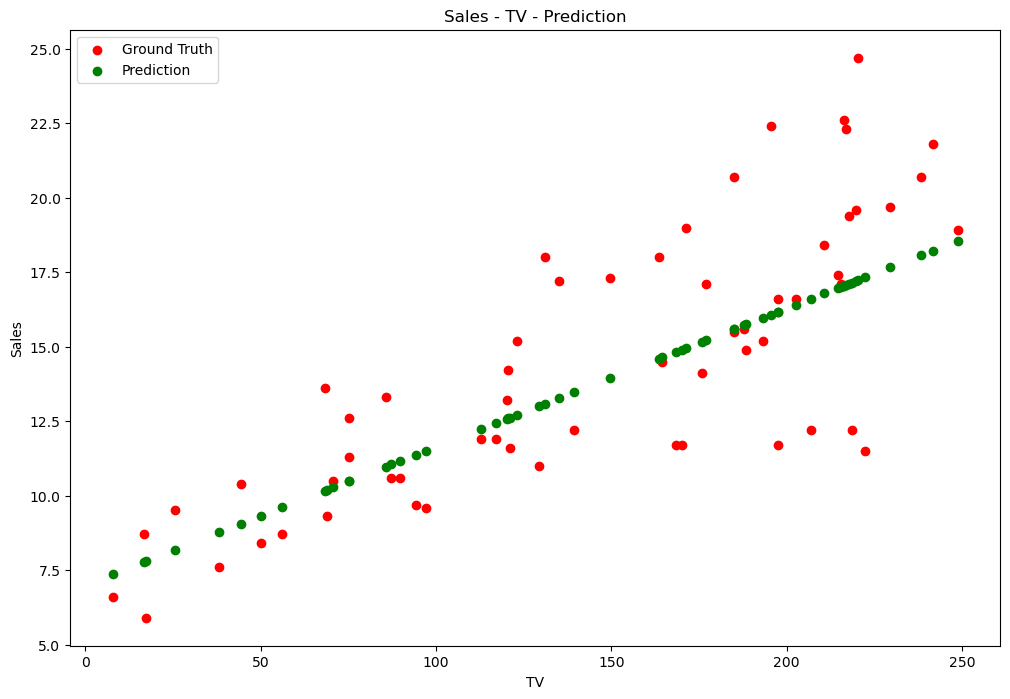

In [23]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(X_test,y_test,label="Ground Truth",color="red")

ax.scatter(X_test, y_pred, label="Prediction",color="green")

plt.title("Sales - TV - Prediction")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

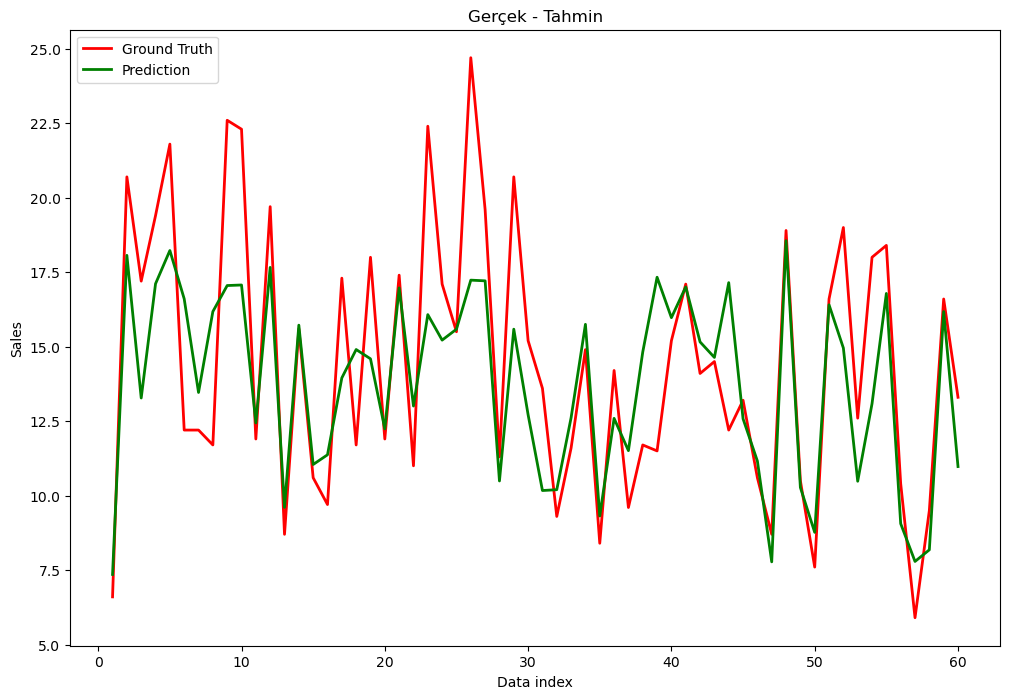

In [24]:
indexler=range(1,61)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test,label="Ground Truth",color="red",linewidth=2)

ax.plot(indexler,y_pred,label="Prediction",color="green",linewidth=2)


plt.title("Gerçek - Tahmin")
plt.xlabel("Data index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

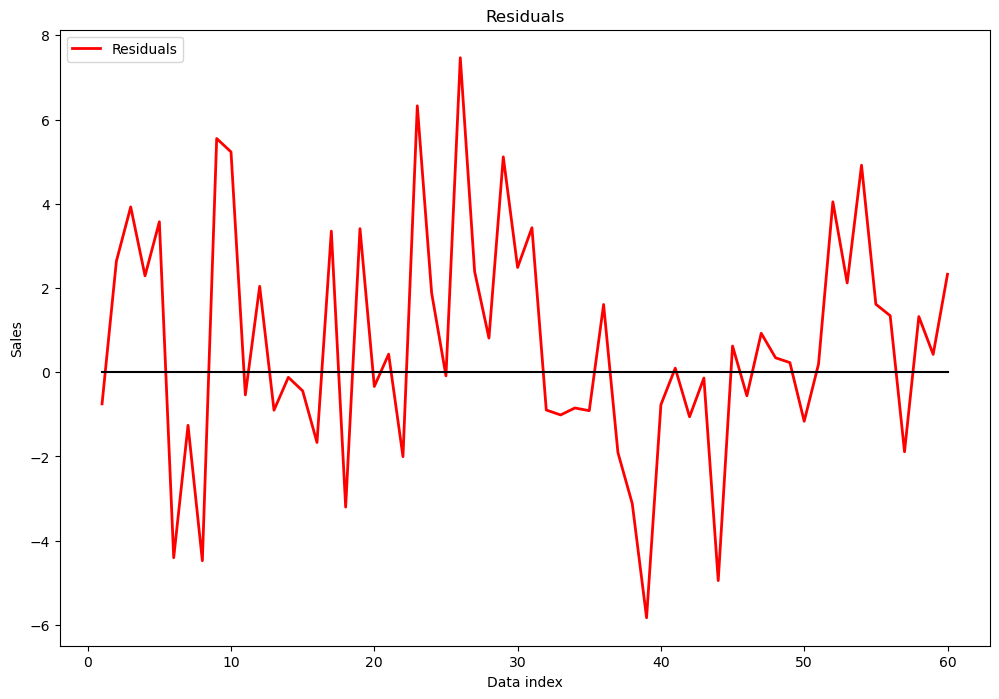

In [26]:
indexler=range(1,61)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test-y_pred,label="Residuals",color="red",linewidth=2)

ax.plot(indexler,np.zeros(60),color="black")

plt.title("Residuals")
plt.xlabel("Data index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
r_2=r2_score(y_test,y_pred)

In [29]:
r_2

0.5942987267783302

In [30]:
mse=mean_squared_error(y_test,y_pred)

In [31]:
mse

7.975798532854849

In [32]:
import math
rmse=math.sqrt(mse)

In [33]:
rmse

2.8241456288327007

In [ ]:
#R^2=59% Model, gerçek datau 60% oranında temsil ediyor. Gerçek hayat contextinde iyi
#RMSE=2.82. Fena değil, bir tahminde ortalamada 3 puana yakın bir yanılma var.